# Marketing Analytics: Evaluating Ad Campaign Success Through A/B Testing


- **Analysis By Aarushi Thakur and Anshruta Thakur**



This project investigates the impact of a marketing ad campaign using A/B testing. 

The primary goal is to determine if the ad campaign was successful in driving conversions and to quantify how much of that success could be attributed to the ads. 

Statistical analyses, including chi-squared tests, Fisher’s Exact Test, and logistic regression, were employed to answer these questions. The findings suggest that the ad group had a significantly higher conversion rate, demonstrating the campaign's success.

**Key Findings:**

- **Conversion Rate**: Ad group = 2.5%, PSA group = 1.7%.
- **Statistical Significance**: Chi-squared test and Fisher’s Exact Test both indicate a significant difference between groups.
- **Impact of Ads**: Logistic regression shows that users in the ad group are approximately 1.48 times more likely to convert than those in the PSA group.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://medium.com/@vlad_zh/ab-testing-imbalance-in-a-b-tests-f0b472a72a67#:~:text=Imbalance%20and%20Variability&text=It%20is%20a%20good%20idea,the%20test%20group%20as%20well.

In [2]:
df = pd.read_csv("marketing_AB.csv")

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


**Data dictionary:**

- Index: Row index
- user id: User ID (unique)
- test group: If "ad"- the person saw the advertisement, if "psa"- they only saw the public service announcement
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

In [4]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [6]:
#pip install ydata-profiling

In [13]:
from ydata_profiling import ProfileReport
import matplotlib

# 1. Data Cleaning

- No missing values were detected in the dataset.
- Removed duplicate user IDs (none were found).
- The 'Unnamed: 0' column was dropped as it was unnecessary.


In [18]:
# Check for misisng values
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [22]:
# Check for duplicate User IDs
df['user id'].duplicated().sum()

0

In [31]:
# Check Data Types
df.dtypes

user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [24]:
# Drop unnecessary columns
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

# 2. Exploratory Data Analysis

In [26]:
df.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [32]:
# Categorical Variables

categorical_cols = ['test group', 'converted', 'most ads day', 'most ads hour']

for col in categorical_cols:
    print(f"{col} : {df[col].unique()}")

test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


In [35]:
df['test group'].value_counts().index

Index(['ad', 'psa'], dtype='object')

## Univariate Analysis

- test group:

     - Two categories: 'ad' and 'psa'.
     - Ad group constitutes approx. 94% of the sample.


- converted:

     - Overall conversion rate is low; 2.5% in the 'ad' group and 1.7% in the 'psa' group.


- total ads:

     - Mean ads viewed = 24.82; median = 13.
     - Positively skewed distribution with a maximum of 2,065 ads.
     
The total ads variable has a long tail, suggesting some users were exposed to a very high number of ads.

In [ ]:
### i) Categorical Variables

In [50]:
def add_percentage_labels(ax, total=None):
    """
    Add percentage labels to each bar in a bar plot.
    """
    
    for p in ax.patches:
        height = p.get_height()
        if total is not None:
            # For count plots
            percentage = '{:.1f}%'.format(100 * height / total)
        else:
            # For plots where heights are already percentages
            percentage = '{:.1f}%'.format(height * 100)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

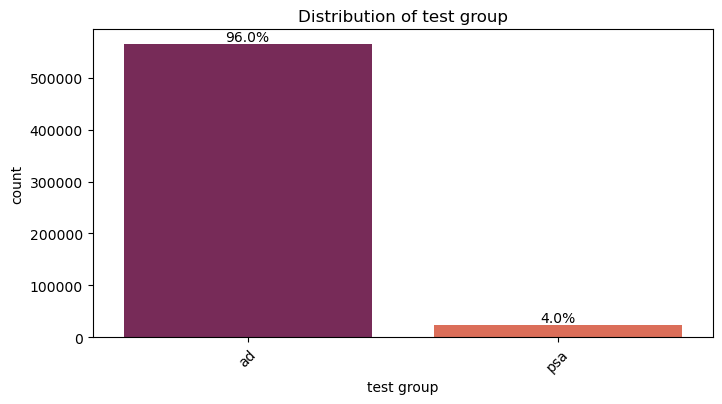

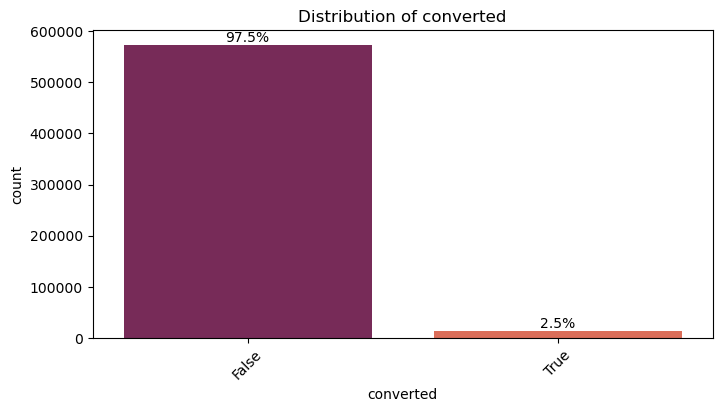

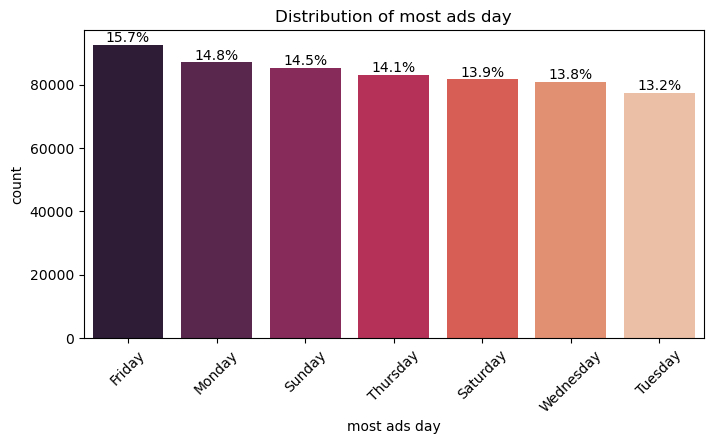

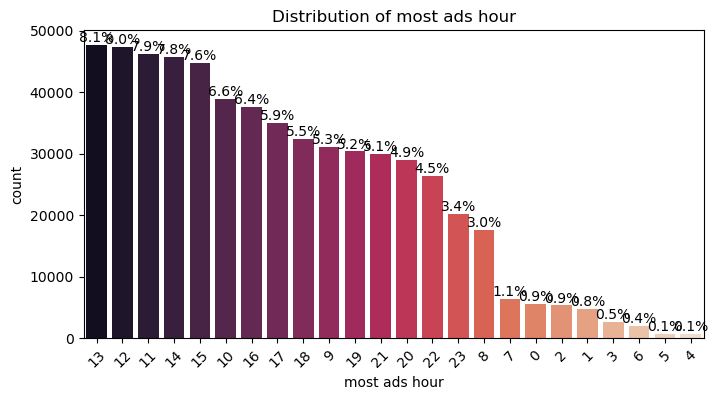

In [72]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='rocket')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
    add_percentage_labels(ax, total=len(df))
    
    plt.show()

In [ ]:
### ii) Numerical Variables

Summary Statistics for 'total ads':

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64


/var/folders/s7/4_c8h3pj413bx1b3j0nqjmp40000gn/T/ipykernel_12955/1325900205.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=df, x='total ads', bins=20, kde=True, palette='rocket')


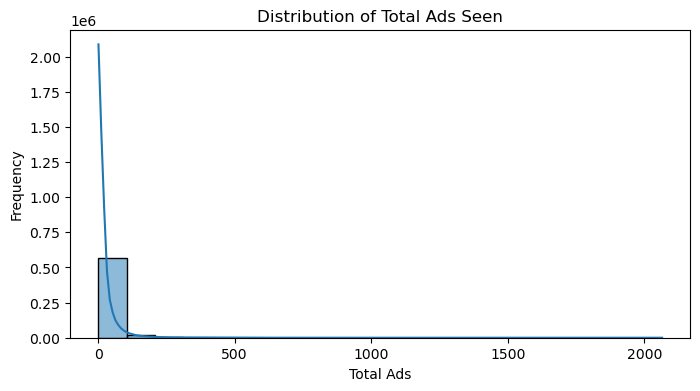

In [73]:
print("Summary Statistics for 'total ads':\n")
print(df['total ads'].describe())


plt.figure(figsize=(8, 4))
ax = sns.histplot(data=df, x='total ads', bins=20, kde=True, palette='rocket')
plt.title('Distribution of Total Ads Seen')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')


plt.show()


## Bivariate Analysis

Initial findings suggest a positive relationship between ad exposure and conversion rates.

- Conversion Rates by test group:

    - Ad group conversion = 2.5%.
    - PSA group conversion = 1.7%.

- Total Ads vs. Conversion:

    - Converted users tend to have seen more ads.

### i) Test Group Conversion Rates

In [83]:
conversion_rate = df.groupby('test group')['converted'].mean() * 100

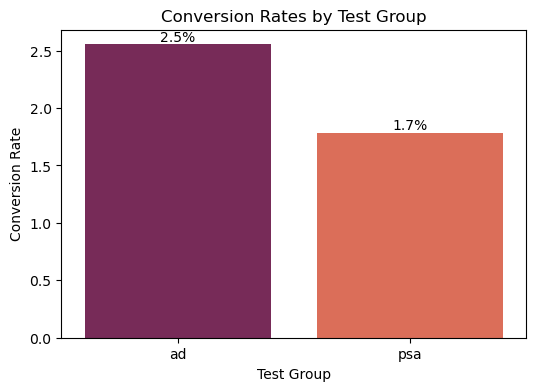

In [82]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette='rocket')
plt.title('Conversion Rates by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')


ax.bar_label(ax.containers[0], labels=['2.5%', '1.7%'])
plt.show()


### ii) Total Ads vs. Conversion

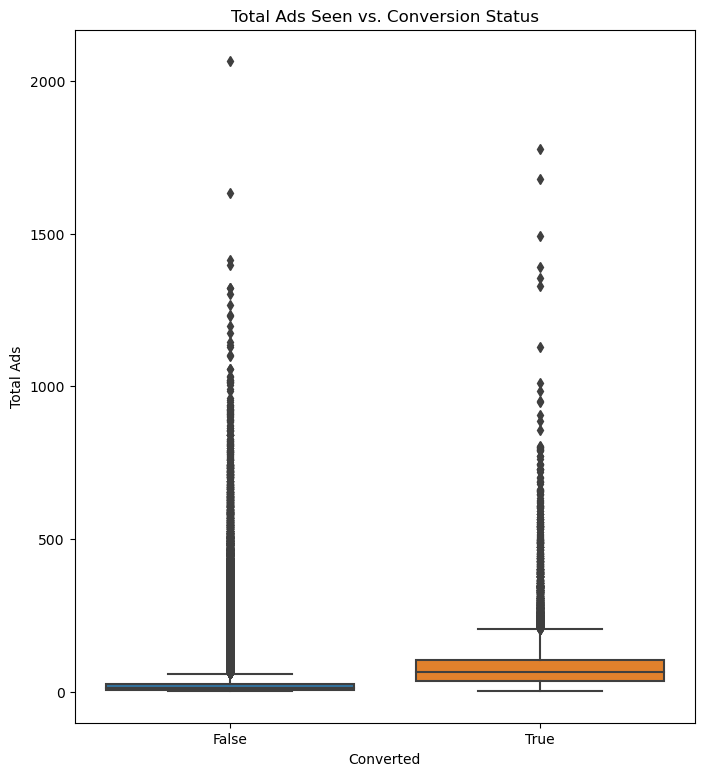

In [88]:
plt.figure(figsize=(8, 9))
sns.boxplot(data=df, x='converted', y='total ads')
plt.title('Total Ads Seen vs. Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Total Ads')
plt.show()


## LOOK FOR: If converters generally saw more ads, it may indicate a positive relationship between ad exposure and conversion.

### iii) Most Ads Day vs. Conversion

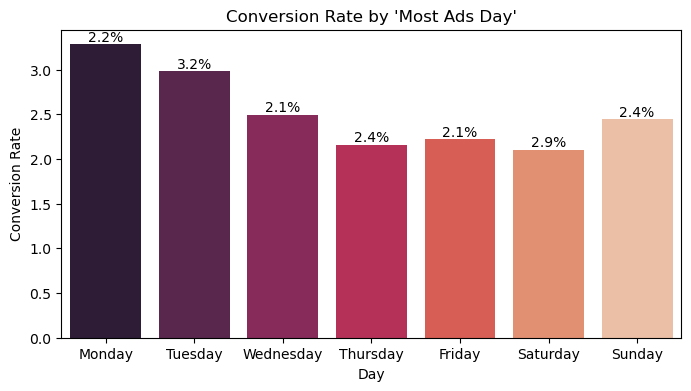

In [96]:
conversion_by_day = (df.groupby('most ads day')['converted'].mean()*100).reset_index()


# Define the correct order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=conversion_by_day, x='most ads day', y='converted', palette='rocket', order=days_order)
plt.title("Conversion Rate by 'Most Ads Day'")
plt.xlabel('Day')
plt.ylabel('Conversion Rate')

ax.bar_label(ax.containers[0], labels=['2.2%', '3.2%', '2.1%', '2.4%', '2.1%', '2.9%', '2.4%'])
plt.show()

### iii) Most Ads Hour vs. Conversion

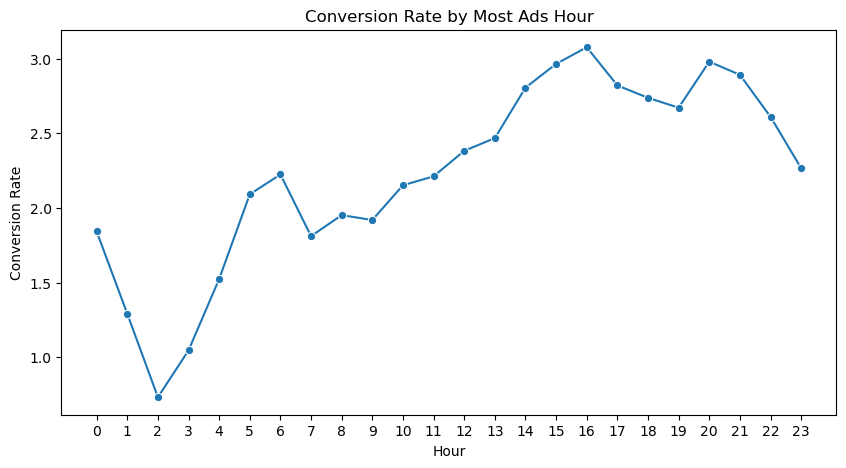

In [99]:
conversion_by_hour = (df.groupby('most ads hour')['converted'].mean()*100).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=conversion_by_hour, x='most ads hour', y='converted', marker='o')
plt.title('Conversion Rate by Most Ads Hour')
plt.xlabel('Hour')
plt.ylabel('Conversion Rate')
plt.xticks(range(0, 24))
plt.show()


# 3. Analysis By Time

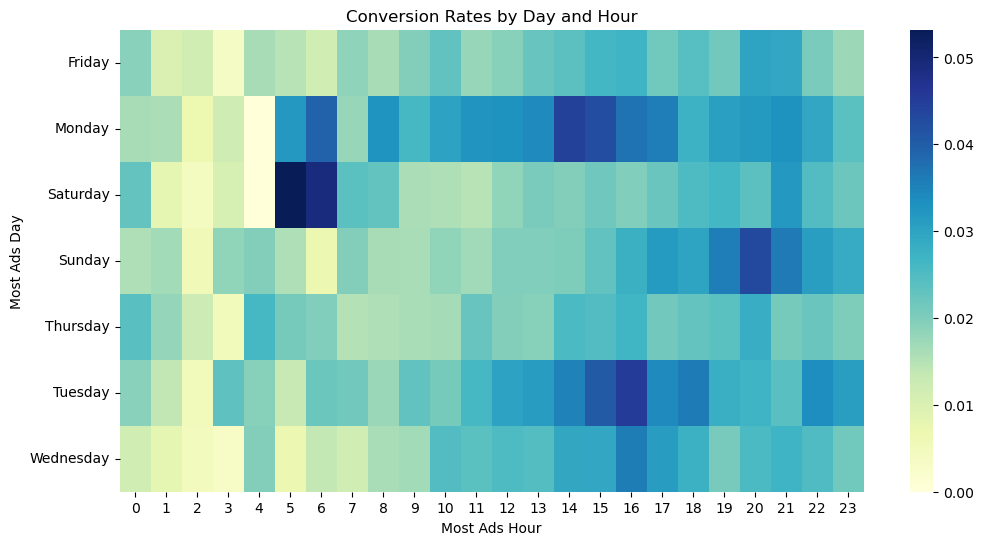

In [106]:
pivot = df.pivot_table(values='converted', index='most ads day', columns='most ads hour', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu') # annot=True, fmt=".1f", 
plt.title('Conversion Rates by Day and Hour')
plt.xlabel('Most Ads Hour')
plt.ylabel('Most Ads Day')
plt.show()

# 4. Correlation Matrix

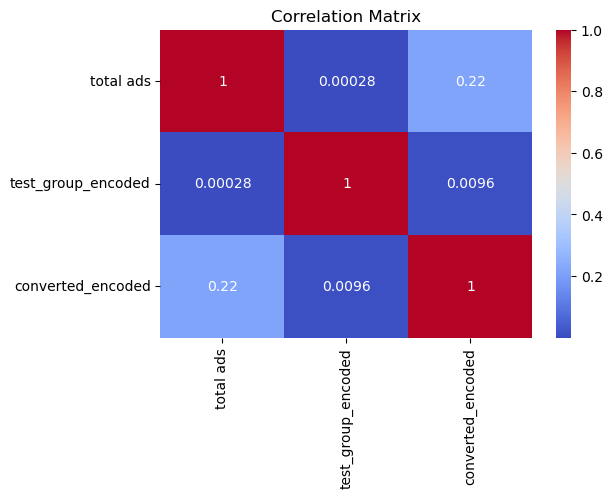

In [107]:
# Encode categorical variables
df['test_group_encoded'] = df['test group'].map({'ad': 1, 'psa': 0})
df['converted_encoded'] = df['converted'].astype(int)

corr_matrix = df[['total ads', 'test_group_encoded', 'converted_encoded']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 5. Statistical Testing and A/B Analysis

Here, we want to determine whether the differences observed between the ad and PSA groups are statistically significant. This will help answer the key questions:

1. Would the campaign be successful?
2. How much of that success can be attributed to the ads?

## Formulating Our Hypotheses

**a. Conversion Rates Between Groups**

- **Null Hypothesis (H0)**: There is no significant difference in conversion rates between the ad group and the PSA group.
- **Alternative Hypothesis (H1)**: There is a significant difference in conversion rates between the ad group and the PSA group.

**b. Effect of Total Ads on Conversion**

- **Null Hypothesis (H0)**: The number of ads seen has no effect on the conversion rate.
- **Alternative Hypothesis (H1)**: The number of ads seen has a significant effect on the conversion rate.

## Chi-squared Test

In [139]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df['test group'], df['converted'])
print("Contingency Table:")
contingency_table

Contingency Table:


converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [140]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of Freedom: {dof}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("\nSince the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant difference in conversion rates between the groups.")
else:
    print("\nSince the p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in conversion rates between the groups.")



Chi-squared Statistic: 54.006
P-value: 0.000
Degrees of Freedom: 1

Since the p-value is less than 0.05, we reject the null hypothesis.
There is a statistically significant difference in conversion rates between the groups.


## Fisher's Exact Test

In [141]:
from scipy.stats import fisher_exact

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)
print(f"\nOdds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant difference in conversion rates between the groups.")
else:
    print("\nSince the p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in conversion rates between the groups.")



Odds Ratio: 0.6934110943143866
P-value: 1.0470720577954195e-14

Since the p-value is less than 0.05, we reject the null hypothesis.
There is a statistically significant difference in conversion rates between the groups.


## Logistic Regression

In [142]:
import statsmodels.api as sm

# Encode categorical variables
df['test_group_binary'] = df['test group'].map({'ad': 1, 'psa': 0})
df['converted_binary'] = df['converted'].astype(int)

# Define independent variables (include potential confounders)
X = df[['test_group_binary', 'total ads']]
y = df['converted_binary']

X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()

logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.108986
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       converted_binary   No. Observations:               588101
Model:                          Logit   Df Residuals:                   588098
Method:                           MLE   Df Model:                            2
Date:                Sat, 14 Sep 2024   Pseudo R-squ.:                 0.07467
Time:                        22:27:59   Log-Likelihood:                -64095.
converged:                       True   LL-Null:                       -69267.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4307      0.051    -86.695      0.000      -4.531      -4.330
test_group_binary     0.3894      0.051      7.562      0.000       0.288       0.490
total ads             0.0101   9.86e-05    102.886      0.000       0.010       0.010
=====================================================================================
"""

- `test_group_binary` coefficient: 0.3894 (p-value < 0.05), indicating that being in the 'ad' group significantly increases the odds of conversion.
- `total ads` coefficient: 0.0101 (p-value < 0.05), suggesting a positive relationship between the number of ads seen and the likelihood of conversion.

In [143]:
import numpy as np

odds_ratios = pd.DataFrame({
    'Variable': X.columns,
    'Odds Ratio': np.exp(logit_model.params),
    'p-value': logit_model.pvalues
})
print("\nOdds Ratios:")
odds_ratios


Odds Ratios:


,Variable,Odds Ratio,p-value
const,const,0.011907,0.000000e+00
test_group_binary,test_group_binary,1.476136,3.970893e-14
total ads,total ads,1.010197,0.000000e+00


**Odds Ratios:**

`test_group_binary` odds ratio: 1.476, showing that users in the 'ad' group are about 1.48 times more likely to convert than those in the 'psa' group.

# Second Hypothesis

### Effect of Total Ads on Conversion

- Null Hypothesis (H0): The number of ads seen has no effect on the conversion rate.
- Alternative Hypothesis (H1): The number of ads seen has a significant effect on the conversion rate.

In [147]:
# Contingency table
contingency_table = pd.crosstab(df['most ads day'], df['converted'])
print("Contingency Table:")
contingency_table

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of Freedom: {dof}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("\nSince the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant effect of the day with the most ads on the conversion rate.")
else:
    print("\nSince the p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("There is no statistically significant effect of the day with the most ads on the conversion rate.")


Contingency Table:

Chi-squared Statistic: 410.048
P-value: 0.000
Degrees of Freedom: 6

Since the p-value is less than 0.05, we reject the null hypothesis.
There is a statistically significant effect of the day with the most ads on the conversion rate.


**Quantifying the Impact of Ads**

In [148]:
conversion_rates = df.groupby('test group')['converted_binary'].mean()
arr = conversion_rates['ad'] - conversion_rates['psa']

print("The difference in conversion rates between the ad group and the PSA group.")
print(f"\nAbsolute Risk Reduction (ARR): {arr:.4f}")


The difference in conversion rates between the ad group and the PSA group.

Absolute Risk Reduction (ARR): 0.0077


In [151]:
rr = conversion_rates['ad'] / conversion_rates['psa']

print("The ratio of the conversion rate in the ad group to that in the PSA group.")
print(f"\nRelative Risk (RR): {rr:.4f}")


The ratio of the conversion rate in the ad group to that in the PSA group.

Relative Risk (RR): 1.4309


**Relative Risk (RR): 1.431, indicates that users in the 'ad' group are 43.1% more likely to convert than those in the 'psa' group.**

In [157]:
nnt = 1 / arr
print(f"Number Needed to Treat (NNT): {nnt:.2f}")
print("\nThis means that 130 users need to be exposed to the ad for one additional conversion.")

Number Needed to Treat (NNT): 130.00

This means that 130 users need to be exposed to the ad for one additional conversion.


In [135]:
attributable_risk_percent = (arr / conversion_rates['ad']) * 100
print(f"Attributable Risk Percent: {attributable_risk_percent:.2f}%")


print("\nThe proportion of conversions in the ad group that can be attributed to the ads.")

Attributable Risk Percent: 30.11%

The proportion of conversions in the ad group that can be attributed to the ads.


# Conclusions

- **Campaign Success**: The ad campaign was successful in driving conversions, as indicated by significantly higher rates in the 'ad' group compared to the 'psa' group.
- **Attribution to Ads**: Approximately 30% of the conversions in the 'ad' group can be attributed to the ad exposure, with a relative risk increase of 43%.
- Optimal ad scheduling times were identified as evenings and specific days of the week (Tuesday, Saturday).

# Recommendations

- Expand Ad Campaign: Given the significant impact of ads, increase ad exposure, particularly on high-conversion days and times.
- Optimize Scheduling: Focus ad delivery during peak conversion hours identified in the analysis.
- Further Analysis: Conduct segmentation analysis to explore if certain user demographics respond better to the ads.